## SME0829 - Machine Learning
### Comparison of classifiers on the Iris dataset

Carolina Spera Braga

## 1. Introduction

In this work, we compare the performance of different classification methods considering a division of the dataset into training and testing sets.

The dataset used is the Iris dataset, and classification will be based on the covariates **Sepal.Length** and **Sepal.Width**.

The methods used were,

- Naive Bayes
- Decision Tree
- Random Forest
- Gradient Boosting
- KNN
- Support Vector Machines
- Bagging
- Ada Boosting

In [1]:
# Libraries used
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
import random
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

## 2. We prepared the training and testing sets

In [2]:
# Iris data
iris = datasets.load_iris()
# We will use only two features for visualization, Sepal.Length and Sepal.Width
X = iris.data[:, :2]  
y = iris.target

# Select the training and testing sets
p = 0.7 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=p, random_state=42)

# Data normalization
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We defined a function to plot the decision regions.

In [3]:
# Function to plot decision regions
def plot_decision_regions(X, y, classifier):
    h = 0.02  # Step size in the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision regions')

## 3. Check the accuracy for the classifiers

## 3.1. Naive Bayes

In [4]:
# Model fitting
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print('Accuracy for Naive Bayes: ', np.round(model.score(X_test, y_test), 4))

Acurácia para Naive Bayes:  0.8222


Text(0.5, 1.0, 'Naive Bayes (Teste)')

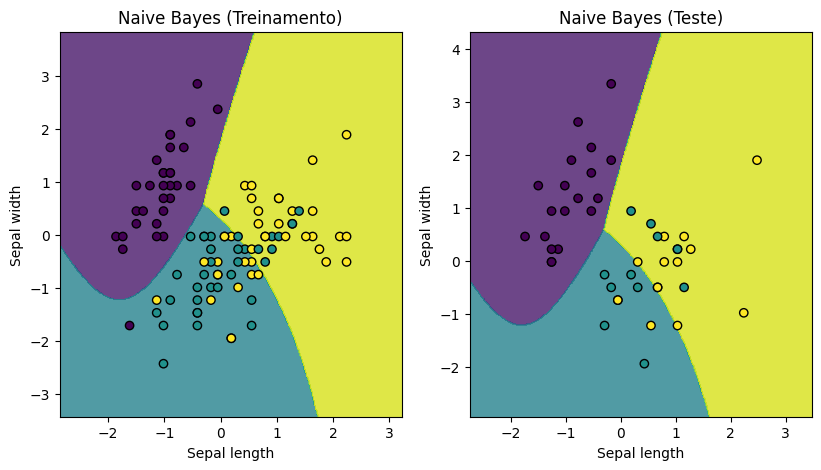

In [5]:
# Decision region
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, model)
plt.title('Naive Bayes (Trainig)')

plt.subplot(132)
plot_decision_regions(X_test, y_test, model)
plt.title('Naive Bayes (Test)')

## 3.2. Decision Tree

In [6]:
# Model fitting
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print('Decision Tree Accuracy: ', np.round(model.score(X_test, y_test),4))

Acurácia para Árvore de Decisão:  0.6889


Text(0.5, 1.0, 'Árvore de Decisão (Teste)')

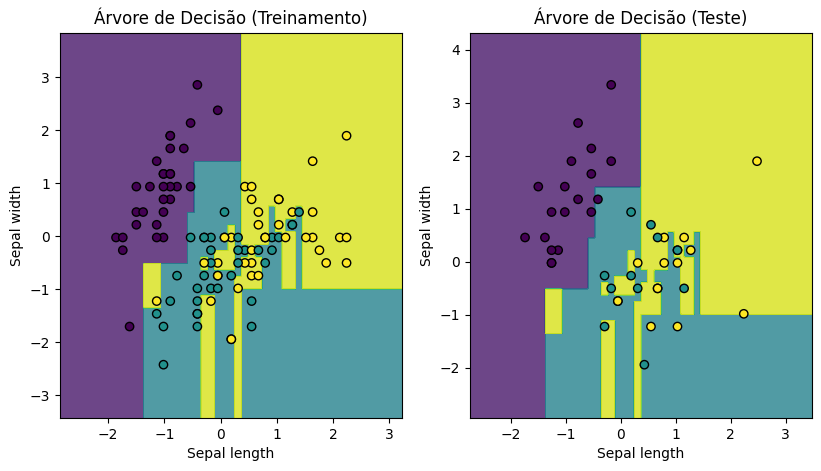

In [7]:
# Decision regions
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, model)
plt.title('Decision Tree (Training)')

plt.subplot(132)
plot_decision_regions(X_test, y_test, model)
plt.title('Decision Tree (Test)')

## 3.3. Random Forest

Number of Estimators: 1 Accuracy: 0.5555555555555556
Number of Estimators: 11 Accuracy: 0.7555555555555555
Number of Estimators: 21 Accuracy: 0.8
Number of Estimators: 31 Accuracy: 0.7777777777777778
Number of Estimators: 41 Accuracy: 0.7333333333333333
Number of Estimators: 51 Accuracy: 0.7777777777777778
Number of Estimators: 61 Accuracy: 0.7555555555555555
Number of Estimators: 71 Accuracy: 0.7777777777777778
Number of Estimators: 81 Accuracy: 0.7555555555555555
Number of Estimators: 91 Accuracy: 0.7777777777777778
Number of Estimators: 101 Accuracy: 0.7777777777777778
Number of Estimators: 111 Accuracy: 0.7555555555555555
Number of Estimators: 121 Accuracy: 0.7777777777777778
Number of Estimators: 131 Accuracy: 0.7777777777777778
Number of Estimators: 141 Accuracy: 0.7555555555555555
Number of Estimators: 151 Accuracy: 0.7777777777777778
Number of Estimators: 161 Accuracy: 0.7333333333333333
Number of Estimators: 171 Accuracy: 0.7555555555555555
Number of Estimators: 181 Accuracy: 

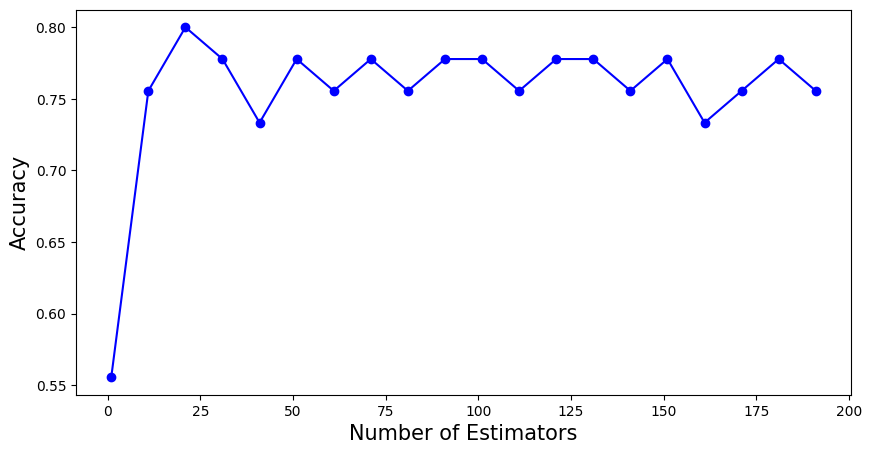

In [8]:
# Model fitting
vscore = []
vn = []
random.seed(123)
for n in range(1,200,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]

print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

Using the entire training set, we can fit the model and perform classification on the test set.

In [9]:
model = RandomForestClassifier(n_estimators=best_n)
model.fit(X_train,y_train)
y_pred = model.predict(X_test) 
score = accuracy_score(y_pred, y_test)

# Accuracy
print('Random Forest Accuracy:', np.round(score,4))

Acurácia para Random Forest: 0.7556


Text(0.5, 1.0, 'Random Forest (Teste)')

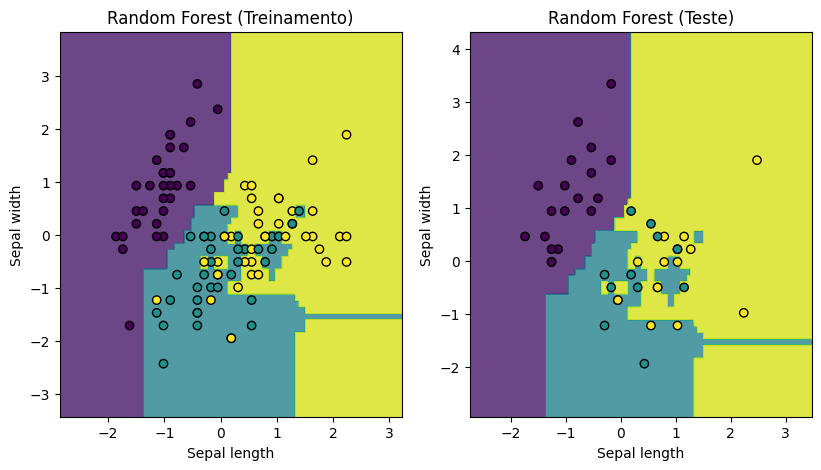

In [10]:
# Regiões de decisão
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, model)
plt.title('Random Forest (Treinamento)')

plt.subplot(132)
plot_decision_regions(X_test, y_test, model)
plt.title('Random Forest (Teste)')

## 3.4. Gradient Boosting

In [11]:
# Model fitting
model = HistGradientBoostingClassifier(random_state=0, learning_rate = 0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test) 

# Accuracy
print('Gradient Boosting Accuracy: ', np.round(model.score(X_test, y_test),4))

Acurácia para Gradient Boosting:  0.8


Text(0.5, 1.0, 'Gradient Boosting (Teste)')

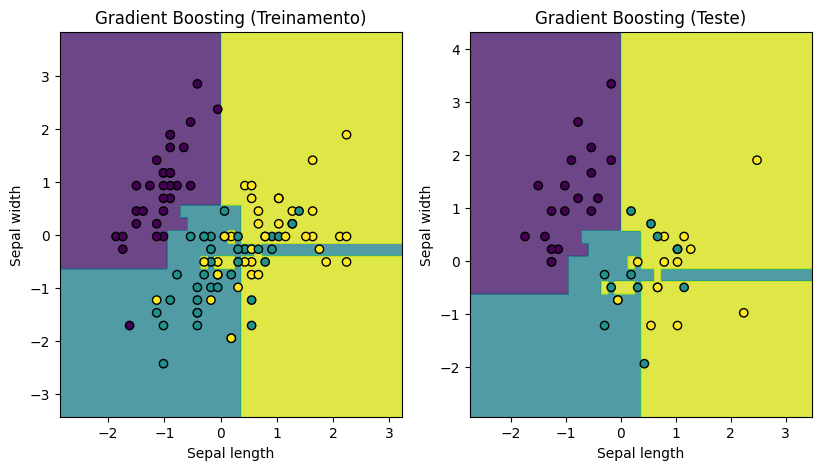

In [12]:
# Decision regions
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, model)
plt.title('Gradient Boosting (Training)')

plt.subplot(132)
plot_decision_regions(X_test, y_test, model)
plt.title('Gradient Boosting (Test)')

## 3.5. KNN

In [13]:
# Model fitting
k = 5 # numero de vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X_train,y_train)
y_pred = model.predict(X_test) 

# Accuracy
print('Accuracy:', np.round(accuracy_score(y_pred, y_test),4))

Acurácia: 0.8


Note that the accuracy value depends on the number of neighbors kk. We can select the best value of kk using cross-validation.

k: 1 accurace: 0.7142857142857142
k: 2 accurace: 0.7047619047619047
k: 3 accurace: 0.7047619047619047
k: 4 accurace: 0.7619047619047619
k: 5 accurace: 0.780952380952381
k: 6 accurace: 0.7523809523809525
k: 7 accurace: 0.780952380952381
k: 8 accurace: 0.7619047619047619
k: 9 accurace: 0.7904761904761906
k: 10 accurace: 0.7904761904761904
k: 11 accurace: 0.780952380952381
k: 12 accurace: 0.7714285714285715
k: 13 accurace: 0.780952380952381
k: 14 accurace: 0.780952380952381
k: 15 accurace: 0.7714285714285715
k: 16 accurace: 0.7809523809523808
k: 17 accurace: 0.8095238095238096
k: 18 accurace: 0.8095238095238095
k: 19 accurace: 0.8095238095238095


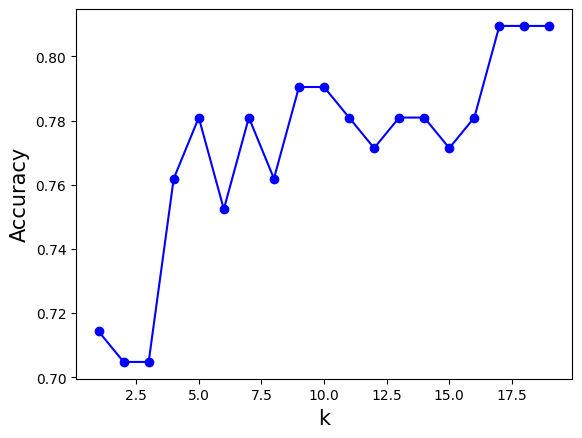

Melhor k: 17


In [14]:
nkf = 5 # Number of folds
vk = [] # Store k values
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # Cross validation
    cv = cross_validate(model, X_train, y_train, cv=nkf)
    print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Best k:', best_k)

Using the entire training set, we can fit the model and perform classification on the test set.

In [15]:
model = KNeighborsClassifier(n_neighbors = best_k, metric = 'euclidean')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Acurácia
print('Accuracy for KNN:', np.round(accuracy_score(y_pred, y_test),4))

Acurácia para KNN: 0.7333


Text(0.5, 1.0, 'KNeighborsClassifier (Teste)')

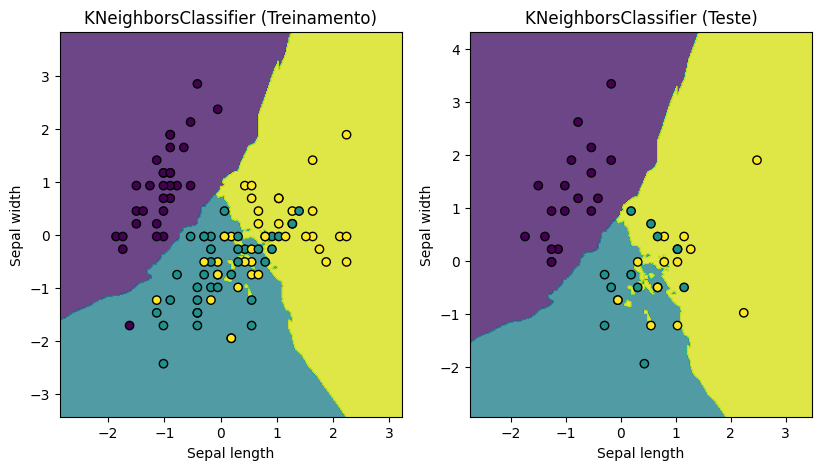

In [16]:
# Decision regions
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, model)
plt.title('KNeighborsClassifier (Training)')

plt.subplot(132)
plot_decision_regions(X_test, y_test, model)
plt.title('KNeighborsClassifier (Test)')

## 3.6. Support Vector Machines

In [17]:
# SVM - linear kernel
svm_linear = svm.SVC(kernel='linear')

# Model training
svm_linear.fit(X_train, y_train)

# Prediction with the test data
y_pred_linear = svm_linear.predict(X_test)

Text(0.5, 1.0, 'SVM - Linear Kernel (Teste)')

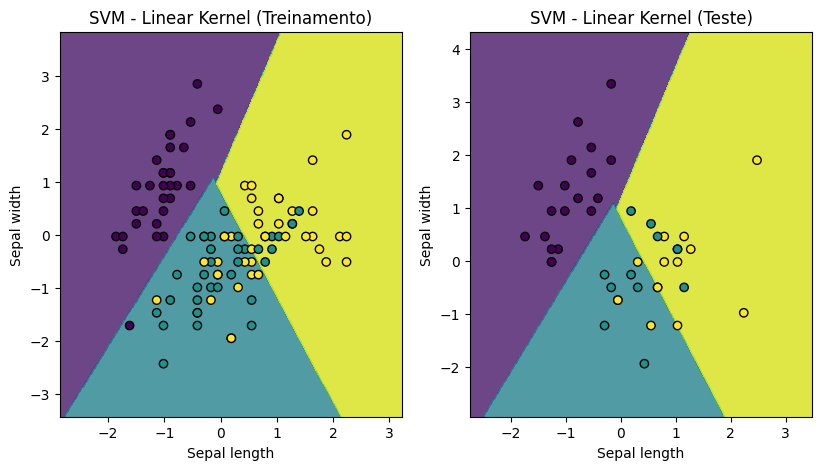

In [18]:
# SVM - linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Decision regions
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, svm_linear)
plt.title('SVM - Linear Kernel (Training)')

plt.subplot(132)
plot_decision_regions(X_test, y_test, svm_linear)
plt.title('SVM - Linear Kernel (Test)')

In [19]:
# Accuracy
print("SVM Accuracy:", np.round(accuracy_score(y_test, y_pred_linear),4))

Acurácia para Máquinas de suporte vetorial: 0.7333


## 3.7. Bagging

In [20]:
# Initialize the decision tree classifier
tree = DecisionTreeClassifier()

# Initialize the Bagging classifier
bagging = BaggingClassifier(base_estimator=tree, n_estimators=20, random_state=42)

# Fit the Bagging classifier to the training data
bagging.fit(X_train, y_train)

# Predict the response for the test set
y_pred = bagging.predict(X_test)

# Accuracy
print("Accuracy for Bagging:", np.round(bagging.score(X_test, y_test), 4))

Acurácia para Bagging: 0.6889


Text(0.5, 1.0, 'Bagging (Teste)')

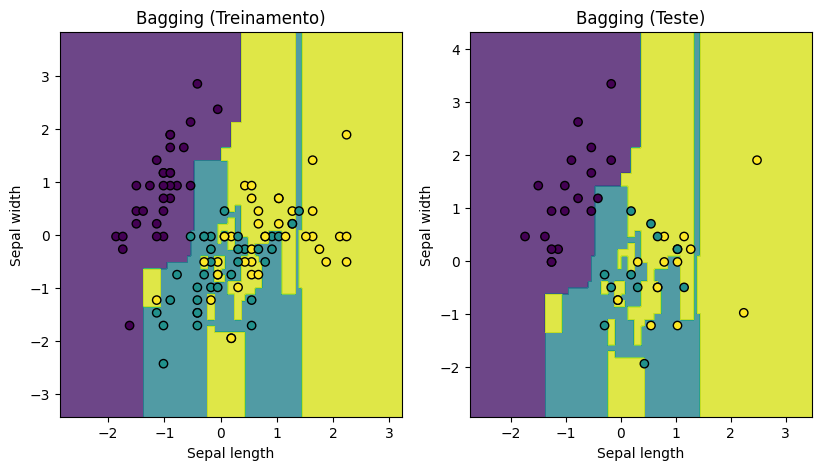

In [21]:
# Decision regions
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, bagging)
plt.title('Bagging (Training)')

plt.subplot(132)
plot_decision_regions(X_test, y_test, bagging)
plt.title('Bagging (Test)')

## 3.8. Ada Boosting

In [22]:
# Initialize the decision tree classifier
tree = DecisionTreeClassifier(max_depth=3)

# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=50,
                              learning_rate=1, random_state=42)

# Fit the AdaBoost classifier to the training data
adaboost.fit(X_train, y_train)

# Predict the response for the test set
y_pred = adaboost.predict(X_test)

# Accuracy
print("Accuracy for Ada Boosting:", np.round(adaboost.score(X_test, y_test),4))

Acurácia para Ada Boosting: 0.7778


Text(0.5, 1.0, 'Ada boosting (Teste)')

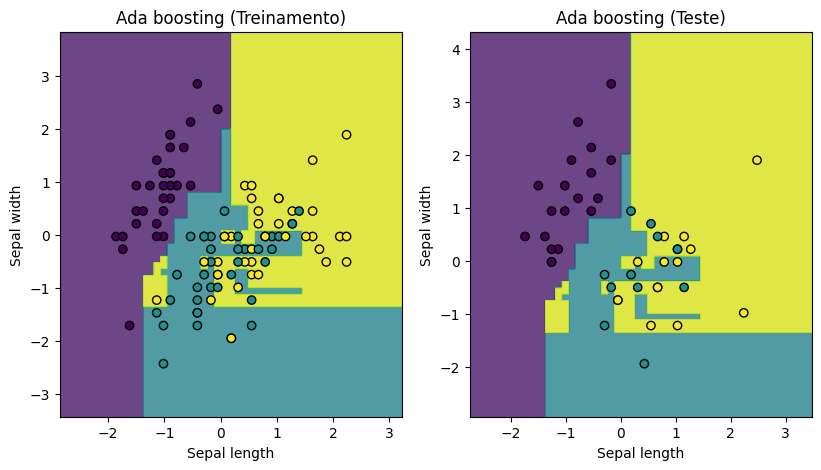

In [23]:
# Decision regions
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_decision_regions(X_train, y_train, adaboost)
plt.title('Ada boosting (Treinamento)')

plt.subplot(132)
plot_decision_regions(X_test, y_test, adaboost)
plt.title('Ada boosting (Teste)')

## 4. Conclusion

The results were:

| Classifier                 | Accuracy |
|----------------------------|----------|
| Naive Bayes                | 0.8222   |
| Gradient Boosting          | 0.8      |
| Ada Boosting               | 0.7778   |
| Random Forest              | 0.7556   |
| KNN                        | 0.7333   |
| Support Vector Machines    | 0.7333   |
| Decision Tree              | 0.6889   |
| Bagging                    | 0.6889   |

Therefore, the Naive Bayes classifier proved to be the most efficient for the Iris dataset when performing classification considering the covariates Sepal.Length and Sepal.Width.

## 5. Lazy Predict Library Analysis

In [24]:
# Lazy Predict Classification
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|█████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.38it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.84,0.82,None,0.84,0.02
LinearSVC,0.82,0.79,None,0.82,0.02
CalibratedClassifierCV,0.82,0.79,None,0.82,0.04
RidgeClassifierCV,0.82,0.79,None,0.81,0.01
RidgeClassifier,0.82,0.79,None,0.81,0.02
GaussianNB,0.82,0.79,None,0.82,0.01
LogisticRegression,0.82,0.79,None,0.82,0.02
SGDClassifier,0.80,0.77,None,0.78,0.01
QuadraticDiscriminantAnalysis,0.80,0.77,None,0.80,0.01


We can see that this library performs the analysis for several classifiers, and the one that achieved the best accuracy performance was LinearDiscriminantAnalysis. Among the classifiers tested earlier, we found that Naive Bayes indeed resulted in the best accuracy, so the results obtained in item 4 are consistent with those obtained using the Lazy Predict library.

## 6. Analysis with the Pycaret library

In this case, we consider all 4 covariates for classification: Sepal.Length, Sepal.Width, Petal.Length, and Petal.Width.

In [25]:
from pycaret.datasets import get_data
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [26]:
# Reading the data
data = pd.read_csv("/home/carol/Documents/Documentos/Code/Python code/Aprendizado de Máquina/Aprendizado_de_Maquina-main/Dados/iris.csv")
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa
...,...,...,...,...,...
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica


In [27]:
from pycaret.classification import *
clf1 = setup(data, target = "Species", session_id=123, log_experiment=True, experiment_name='iris')

,Description,Value
0,Session id,123
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"setosa: 0, versicolor: 1, virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [28]:
# Best models according to Pycaret
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.9971,0.9718,0.9780,0.9712,0.9573,0.9609,0.3210
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.1120
qda,Quadratic Discriminant Analysis,0.9718,0.9974,0.9718,0.9780,0.9712,0.9573,0.9609,0.0140
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0170
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.0210
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0150
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.0710
gbc,Gradient Boosting Classifier,0.9355,0.9792,0.9355,0.9416,0.9325,0.9023,0.9083,0.1050
xgboost,Extreme Gradient Boosting,0.9355,0.9868,0.9355,0.9440,0.9343,0.9023,0.9077,0.0250
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0180


Finally, with the Pycaret library and the analysis done for the four covariates, we found that the models Logistic Regression, KNN, Quadratic Discriminant Analysis, and Linear Discriminant Analysis all achieved an accuracy of 0.9718 and were the best evaluated.